> # **MOVIE RECOMMENDATION SYSTEM**

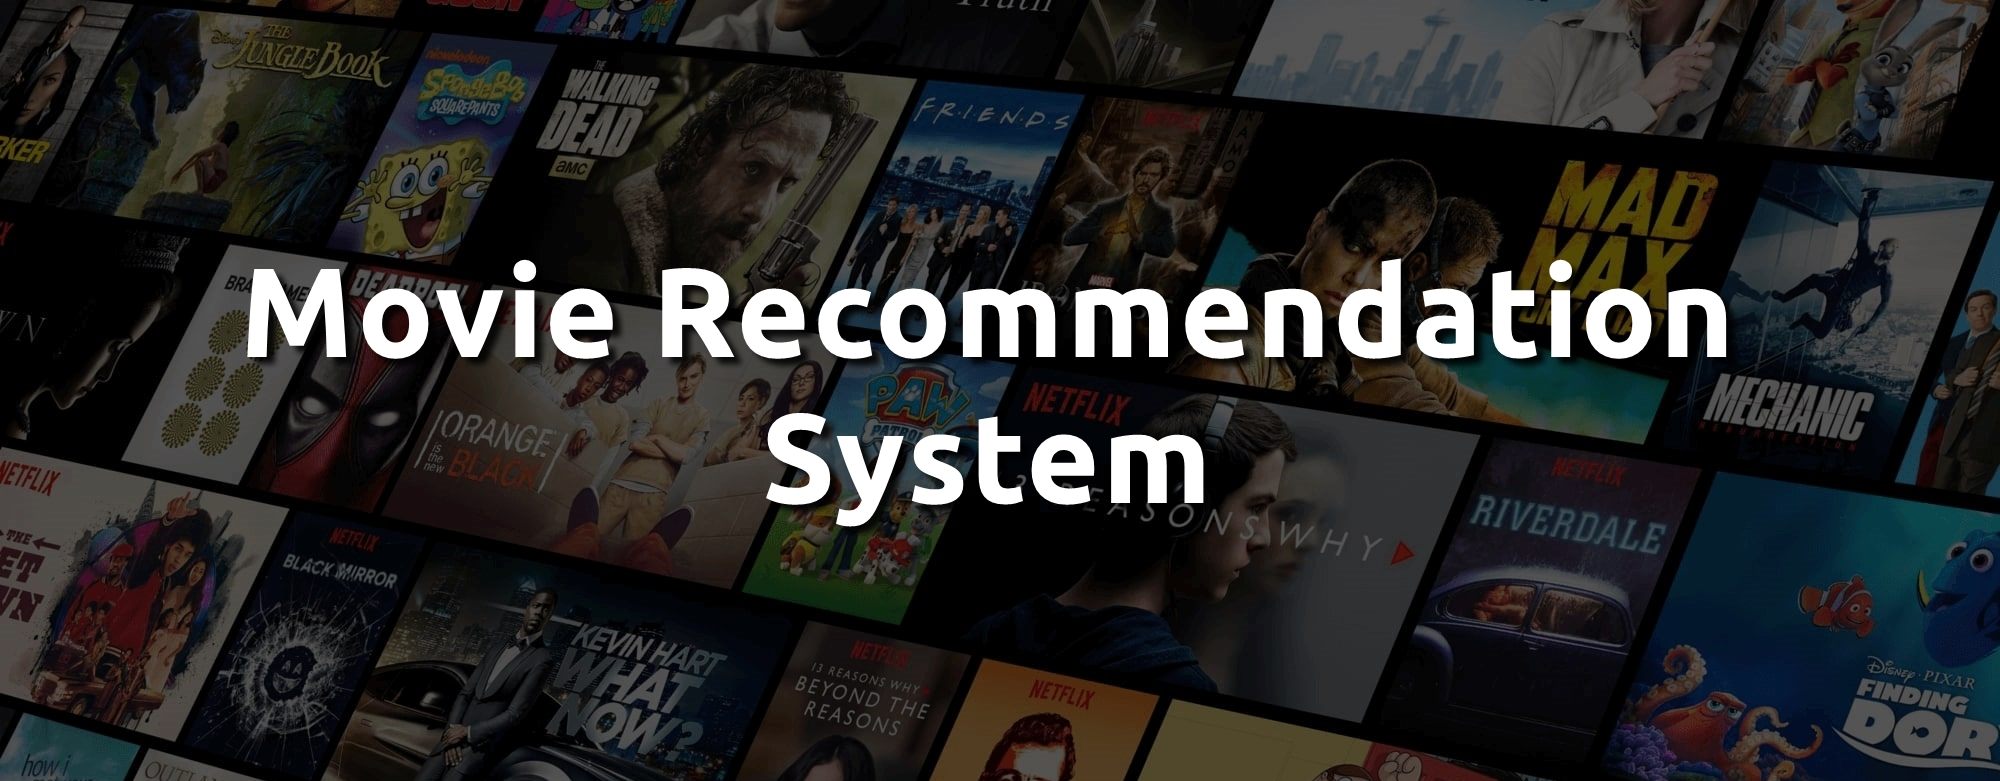

> ### `Movie Dataset` Features
> - **budget**: The amount of money that was allocated for producing the movie. It’s usually a numeric value representing the financial expenditure.<br><br>
> - **genres**: The genres of the movie, which could include categories like Action, Drama, Comedy, etc. This feature often contains a list of genres.<br><br>
> - **homepage**: The URL of the official homepage or website for the movie. It’s usually a string containing a web address.<br><br>
> - **keywords**: Keywords or tags associated with the movie that describe its themes or important aspects. This feature is often a list of strings.<br><br>
> - **original_language**: The language in which the movie was originally produced. This is typically a two-letter ISO 639-1 code (e.g., "en" for English, "fr" for French).<br><br>
> - **original_title**: The original title of the movie as it was released in its country of origin. This is a string value.<br><br>
> - **overview**: A brief summary or description of the movie’s plot. It’s usually a string that gives an idea of what the movie is about.<br><br>
> - **popularity**: A numeric score representing the popularity of the movie, which might be calculated based on factors like viewership or social media activity.<br><br>
> - **production_companies**: The companies that were involved in the production of the movie. This is often a list of company names.<br><br>
> - **production_countries**: The countries where the movie was produced. This is often a list of country names or country codes.<br><br>
> - **release_date**: The date on which the movie was released. It’s usually in a standard date format (e.g., YYYY-MM-DD).<br><br>
> - **revenue**: The total revenue earned by the movie, typically measured in the currency used in the dataset (e.g., USD).<br><br>
> - **runtime**: The length of the movie in minutes. This is a numeric value representing the total duration of the film.<br><br>
> - **spoken_languages**: The languages spoken in the movie. This feature might include a list of language codes or names.<br><br>
> - **status**: The release status of the movie, such as “Released,” “Post Production,” or “Canceled.” It’s a string describing the current status.<br><br>
> - **tagline**: A brief, memorable phrase or slogan associated with the movie, used for marketing purposes. It’s a string.<br><br>
> - **title**: The title of the movie as it is commonly known or advertised. This is a string value.<br><br>
> - **vote_average**: The average rating given to the movie, often on a scale of 1 to 10. This is a numeric value representing the average user rating.<br><br>
> - **vote_count**: The total number of votes or ratings the movie has received. This is a numeric value indicating how many people have rated the movie.
<br><br>

> ### `Credits Dataset` Features
> - **cast**: Information about the actors who appeared in the movie. This feature usually includes details like actor names, character names, and possibly the order of appearance. It can be a list of dictionaries or a more complex nested structure.<br><br>
> - **crew**: Information about the crew members involved in the production of the movie, such as directors, writers, producers, and other key staff. This feature often includes their names, roles, and possibly additional details about their contributions. Like the cast, it can be a list of dictionaries or a structured format.

<hr>

> ### IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import ast
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<HR>

> # **DATASET OVERVIEW**

> Both datasets, when combined, can provide a comprehensive view of movies, including their attributes and the people involved in their creation.

In [2]:
movies_df = pd.read_csv('movies.csv')
credits_df = pd.read_csv('credits.csv')

In [3]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [4]:
credits_df.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


<HR>

> # **DATA PREPROCESSING**

> We need to create three columns using both the datasets: `Movie_id`, `Movie_name`, and `Tags`. The `Tags` column will be generated by appending all the other features to the `overview` feature.

In [5]:
# Joining both the datasets
movies = movies_df.merge(credits_df, left_on='title', right_on='title')
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


> ### FEATURE SELECTION

> #### `Important Columns`:
> - **id**: Used for fetching movie posters.
<br><br>
> - **title**: The title of the movie.
<br><br>
> - **genres**: Essential for categorizing and understanding the movie’s genre.
<br><br>
> - **keywords**: Provides a descriptive overview of the movie’s themes and elements.
<br><br>
> - **overview**: Crucial for summarizing the plot of the movie.
<br><br>
> - **cast**: Lists the actors involved in the movie.
<br><br>
> - **crew**: Includes key contributors such as directors.
<br><br>

> #### `Less Important Columns`:
> - **original_language**: While it can be relevant, most movies in this dataset are in English, so it is less critical.<br><br>
> - **original_title**: Similar to the title; since most movies are English, the title column suffices.<br><br>
> - **popularity**: Useful but more relevant for future scoring rather than immediate analysis.<br><br>
> - **production_companies**: Not essential for current analysis.<br><br>
> - **production_countries**: Less relevant for this dataset.<br><br>
> - **release_date**: Important but can be categorized into broader time periods (e.g., 80s, 90s) for simplicity.<br><br>
> - **revenue**: Not crucial for the current analysis.<br><br>
> - **runtime**: Not essential for the current scope.<br><br>
> - **spoken_languages**: Moderately important but less so compared to other columns.<br><br>
> - **status**: Not relevant for the analysis.<br><br>
> - **tagline**: Often described in the overview, so it is less critical.<br><br>

In [6]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


> ### HANDLING MISSING VALUES

In [7]:
movies.isna().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [8]:
movies = movies.dropna(subset=['overview'])

In [9]:
# Handling Duplicated values
movies.duplicated().sum()

0

> ### FEATURE TRANSFORMATION

> The data of features (`overview, genres, keywords, cast, crew`) is in `string` we have to convert them into `lists` in order to perform operations on them

In [10]:
def transform_feature(obj):
    '''
        This function uses python inbuilt module ast - its function literal_eval which helps to evaluate the strings and returns list.
    '''
    lst = []
    for i in ast.literal_eval(obj):
        lst.append(i['name'])
    return lst

In [11]:
movies['genres'] = movies['genres'].apply(transform_feature)
movies['keywords'] = movies['keywords'].apply(transform_feature)

> We have to fetch `first three actors/actoress` associated with every movie from `cast feature`

In [12]:
def transform_cast(obj):
    lst = []
    counter = 0

    for i in ast.literal_eval(obj):
        if counter < 3:
            lst.append(i['name']) # We want irl(in real life) name
            counter += 1
        else:
            break
    return lst

In [13]:
movies['cast'] = movies['cast'].apply(transform_cast)

> We have to fetch `all the directors` associated with every movie from `crew feature`

In [14]:
def transform_crew(obj):
    lst = []

    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            lst.append(i['name'])
    return lst

In [15]:
movies['crew'] = movies['crew'].apply(transform_crew)

> The `Overview` feature is in `string`, we have to transform it to `list` so that we can combine all the `tags oriented features`

In [16]:
movies['overview'] = movies['overview'].apply(lambda i: i.split())

In [17]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


> - After transforming the names, such as `"Sam Volt" into ["Sam", "Volt"]`, we face a problem: the name `"Sam Volt" might appear the same as other names with different last names`. To address this, `we need to combine the first and last names back into a single string`.
<br><br>
> - For example, `"Sam Volt"` should be transformed to `"SamVolt"` to ensure it is treated as a unique entity and avoid confusion with other similar names.

In [18]:
def collapse(L):
    lst = []
    for i in L:
        lst.append(i.replace(" ",""))
    return lst

In [19]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)

In [20]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]


> `Reframing dataset`

In [21]:
# Combining all the features
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [22]:
# Since we combined all these columns there is no further need of these columns
new_df = movies.drop(columns=['overview','genres','keywords','cast','crew'])

In [23]:
# Converting back from list to string so that we can apply string vectorization
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))

In [24]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


> The `PorterStemmer` class from the `Natural Language Toolkit (NLTK)` is used for `stemming words in text`. `Stemming is a text normalization process that reduces words to their base or root form`. For instance, the words `"running," "runner,"` and "ran" might all be reduced to the root form "run."

In [25]:
ps = PorterStemmer()

def stem(text):
    '''
        The PorterStemmer class from the Natural Language Toolkit (NLTK) is used for stemming words in text. Stemming is a text normalization process that reduces words to their base or root form.
    '''
    y = []

    for i in text.split():
        y.append(ps.stem(i))
    
    return " ".join(y)

new_df['tags'] = new_df['tags'].apply(stem)

In [26]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


<hr>

> # **STRING VECTORIZATION**

> `CountVectorizer` from the sklearn.feature_extraction.text module is a tool in Scikit-learn used for `converting a collection of text documents into a matrix of token counts`. This technique is commonly known as `Bag of Words (BoW)`. It essentially transforms `text data into numerical form` so that machine learning algorithms can process it.

In [27]:
cv = CountVectorizer(max_features=5000, stop_words='english')

In [28]:
vectors = cv.fit_transform(new_df['tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

<hr>

> # **COSINE DISTANCES**

> `cosine_similarity` from the sklearn.metrics.pairwise module is a function used to measure the `cosine similarity between pairs of vectors`. It is commonly used in `text mining and information retrieval to determine the similarity between text documents represented as vectors`. Cosine similarity quantifies how similar two vectors are, irrespective of their magnitude, by measuring the `cosine of the angle between them`.

In [30]:
similarities = cosine_similarity(vectors)
similarities

array([[1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
        0.        ],
       [0.08346223, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.0860309 , 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04499213, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]])

<hr>

> # **RECOMMENDATION METHOD**

> - The function takes a movie title as input and uses it to find the index of that movie in the DataFrame.
<br><br>
> - It retrieves the similarity scores for that movie and sorts these scores to find the most similar movies.
<br><br>
> - It then prints out the titles of the top 10 most similar movies, excluding the movie itself from the results.

In [39]:
def recommendation(Movie: str) -> None:
    # Fetching the index of provided movie
    movie_idx = new_df[new_df['title'] == Movie].index[0]
    

    # Fetching simiarity scores
    distances = similarities[movie_idx]

    # Finding the top 10 movies having highest similarities
    movie_list = sorted(list(enumerate(distances)), reverse=True, key=lambda i: i[1])[1:11] # 0 belongs to self similarity

    for i in movie_list:
        print(new_df.iloc[i[0]]['title'])

In [40]:
recommendation('Avatar')

0
Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.
Battle: Los Angeles
Predators
Small Soldiers
Meet Dave
U.F.O.


<hr>

> # **OBJECT EXTRACTION**

> `pickle` - Create portable serialized representations of Python objects.

In [34]:
import pickle

pickle.dump(new_df.to_dict(), open('movies.pkl', 'wb'))

In [35]:
pickle.dump(similarities, open('similarities_matrix.pkl', 'wb'))